In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read data from csv file
data = pd.read_csv('cs_05.csv')
data.head()

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [3]:
data.shape

(322, 21)

## Data Understanding

#### 1: Understand data collection process

#### 2: Document data set description (meta data)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       322 non-null    object 
 1   AtBat      322 non-null    int64  
 2   Hits       322 non-null    int64  
 3   HmRun      322 non-null    int64  
 4   Runs       322 non-null    int64  
 5   RBI        322 non-null    int64  
 6   Walks      322 non-null    int64  
 7   Years      322 non-null    int64  
 8   CAtBat     322 non-null    int64  
 9   CHits      322 non-null    int64  
 10  CHmRun     322 non-null    int64  
 11  CRuns      322 non-null    int64  
 12  CRBI       322 non-null    int64  
 13  CWalks     322 non-null    int64  
 14  League     322 non-null    object 
 15  Division   322 non-null    object 
 16  PutOuts    322 non-null    int64  
 17  Assists    322 non-null    int64  
 18  Errors     322 non-null    int64  
 19  Salary     263 non-null    float64
 20  NewLeague 

#### 3: Check for missing values

In [5]:
np.sum(data.isnull(), axis = 0)

Name          0
AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [6]:
#Define is_salary_missed
data['is_salary_missed'] = data['Salary'].isnull()
data.head()

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,is_salary_missed
0,Andy Allanson,293,66,1,30,29,14,1,293,66,...,29,14,A,E,446,33,20,NaN,A,True
1,Alan Ashby,315,81,7,24,38,39,14,3449,835,...,414,375,N,W,632,43,10,475.0,N,False
2,Alvin Davis,479,130,18,66,72,76,3,1624,457,...,266,263,A,W,880,82,14,480.0,A,False
3,Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,838,354,N,E,200,11,3,500.0,N,False
4,Andres Galarraga,321,87,10,39,42,30,2,396,101,...,46,33,N,E,805,40,4,91.5,N,False


##### Analysis of MVs

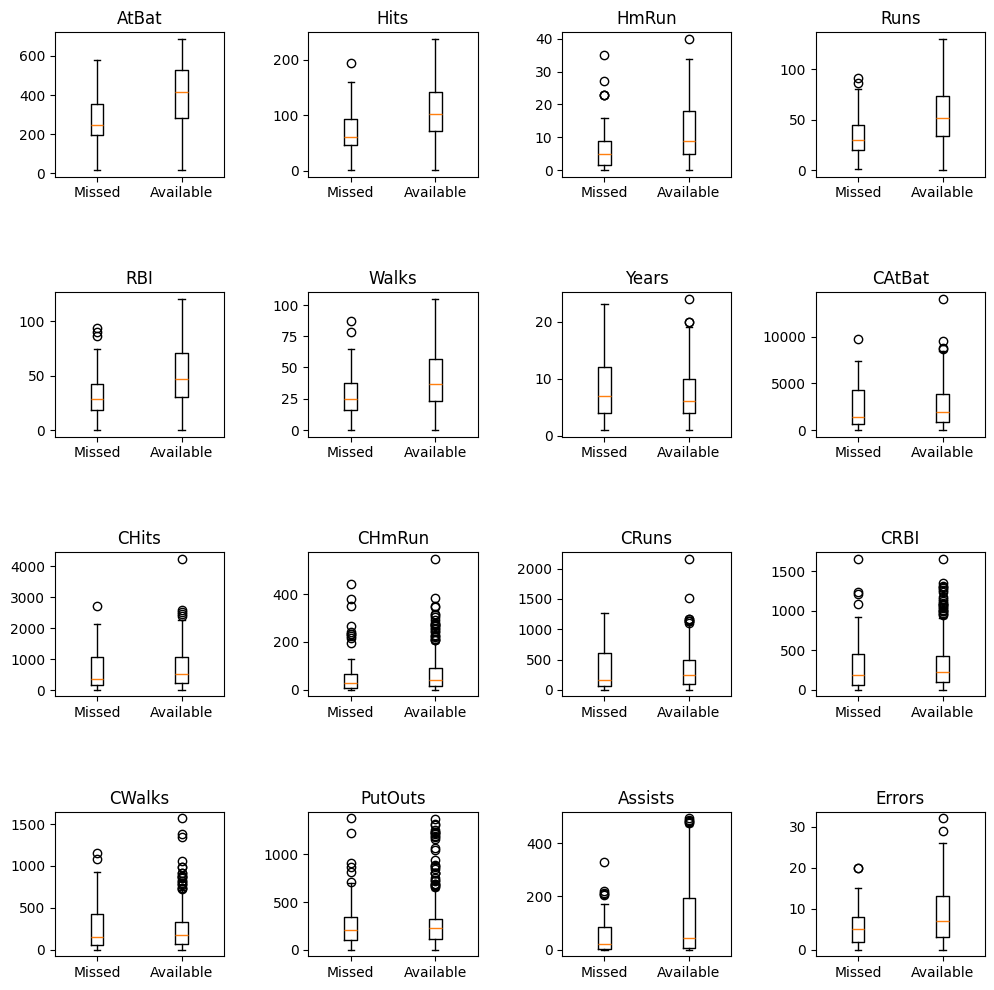

In [7]:
var_ind = list(range(1, 14)) + list(range(16, 19))
plot = plt.figure(figsize = (12, 12))
plot.subplots_adjust(hspace = 0.8, wspace = 0.5)
for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.boxplot([data.loc[data['is_salary_missed'] == True, data.columns[var_ind[i - 1]]],
                 data.loc[data['is_salary_missed'] == False, data.columns[var_ind[i - 1]]]])
    plt.title(data.columns[var_ind[i - 1]])
    plt.xticks(ticks = [1, 2], labels = ['Missed', 'Available'])

##### MVs analysis from categorical variables perspective

In [8]:
for i in ['League', 'Division', 'NewLeague']:
    cross_tab_pct = round(pd.crosstab(data[i], 
                                      data['is_salary_missed'], 
                                      normalize = 'index'), 2)
    print('--- Cross tab of is_salary_missed vs. ' + i + ' ---')
    print(cross_tab_pct)

--- Cross tab of is_salary_missed vs. League ---
is_salary_missed  False  True 
League                        
A                  0.79   0.21
N                  0.84   0.16
--- Cross tab of is_salary_missed vs. Division ---
is_salary_missed  False  True 
Division                      
E                  0.82   0.18
W                  0.81   0.19
--- Cross tab of is_salary_missed vs. NewLeague ---
is_salary_missed  False  True 
NewLeague                     
A                  0.80   0.20
N                  0.84   0.16


In [9]:
#Remove records with MVs
data.dropna(subset = 'Salary', inplace = True)
np.sum(data.isnull(), axis = 0)

Name                0
AtBat               0
Hits                0
HmRun               0
Runs                0
RBI                 0
Walks               0
Years               0
CAtBat              0
CHits               0
CHmRun              0
CRuns               0
CRBI                0
CWalks              0
League              0
Division            0
PutOuts             0
Assists             0
Errors              0
Salary              0
NewLeague           0
is_salary_missed    0
dtype: int64

In [10]:
#Remove is_salary_missed
data.drop(columns = 'is_salary_missed', inplace = True)
data.info()
#Note: sample size is small

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       263 non-null    object 
 1   AtBat      263 non-null    int64  
 2   Hits       263 non-null    int64  
 3   HmRun      263 non-null    int64  
 4   Runs       263 non-null    int64  
 5   RBI        263 non-null    int64  
 6   Walks      263 non-null    int64  
 7   Years      263 non-null    int64  
 8   CAtBat     263 non-null    int64  
 9   CHits      263 non-null    int64  
 10  CHmRun     263 non-null    int64  
 11  CRuns      263 non-null    int64  
 12  CRBI       263 non-null    int64  
 13  CWalks     263 non-null    int64  
 14  League     263 non-null    object 
 15  Division   263 non-null    object 
 16  PutOuts    263 non-null    int64  
 17  Assists    263 non-null    int64  
 18  Errors     263 non-null    int64  
 19  Salary     263 non-null    float64
 20  NewLeague  263 

#### 4: Univariate data analysis

In [11]:
#Check if there is duplicate rows
print(np.sum(data.duplicated()))

0


### Histogram of numeric variables

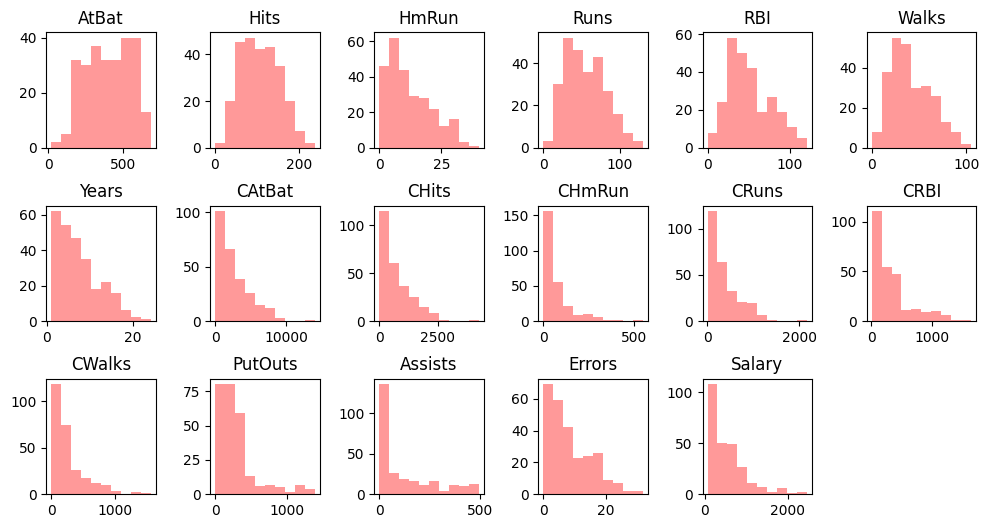

In [12]:
var_ind=list(range(1,14))+list(range(16,20))
plt.figure(figsize = (12, 6))
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1,18):
    plt.subplot(3,6,i)
    plt.hist(x = data.iloc[: , var_ind[i - 1]], alpha = 0.4, color = 'red')
    plt.title(data.columns[var_ind[i - 1]])

In [13]:
#Summary statistics of numeric variables
data.iloc[: , var_ind].describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,451.118681
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,190.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,425.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,2460.000000


### Check for outliers

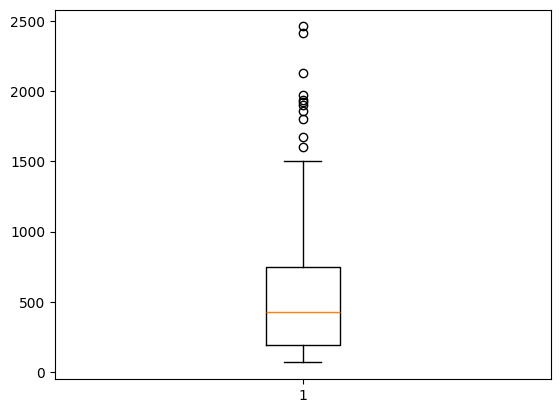

In [14]:
plt.boxplot(data['Salary'])
plt.show()

In [15]:
#Categorical variables
for i in ['League', 'Division', 'NewLeague']:
    print('--- Frequency Tabel of ' + i + ' ---')
    print(data[i].value_counts())

--- Frequency Tabel of League ---
League
A    139
N    124
Name: count, dtype: int64
--- Frequency Tabel of Division ---
Division
W    134
E    129
Name: count, dtype: int64
--- Frequency Tabel of NewLeague ---
NewLeague
A    141
N    122
Name: count, dtype: int64


#### 5: Bivariate data analysis

In [16]:
#Pearson Correlation analysis
corr_table = round(data.iloc[:, var_ind].corr(method = 'pearson'), 2)
corr_table

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.00,0.96,0.56,0.90,0.80,0.62,0.01,0.21,0.23,0.21,0.24,0.22,0.13,0.31,0.34,0.33,0.39
Hits,0.96,1.00,0.53,0.91,0.79,0.59,0.02,0.21,0.24,0.19,0.24,0.22,0.12,0.30,0.30,0.28,0.44
HmRun,0.56,0.53,1.00,0.63,0.85,0.44,0.11,0.22,0.22,0.49,0.26,0.35,0.23,0.25,-0.16,-0.01,0.34
Runs,0.90,0.91,0.63,1.00,0.78,0.70,-0.01,0.17,0.19,0.23,0.24,0.20,0.16,0.27,0.18,0.19,0.42
RBI,0.80,0.79,0.85,0.78,1.00,0.57,0.13,0.28,0.29,0.44,0.31,0.39,0.23,0.31,0.06,0.15,0.45
Walks,0.62,0.59,0.44,0.70,0.57,1.00,0.13,0.27,0.27,0.35,0.33,0.31,0.43,0.28,0.10,0.08,0.44
Years,0.01,0.02,0.11,-0.01,0.13,0.13,1.00,0.92,0.90,0.72,0.88,0.86,0.84,-0.02,-0.09,-0.16,0.40
CAtBat,0.21,0.21,0.22,0.17,0.28,0.27,0.92,1.00,1.00,0.80,0.98,0.95,0.91,0.05,-0.01,-0.07,0.53
CHits,0.23,0.24,0.22,0.19,0.29,0.27,0.90,1.00,1.00,0.79,0.98,0.95,0.89,0.07,-0.01,-0.07,0.55
CHmRun,0.21,0.19,0.49,0.23,0.44,0.35,0.72,0.80,0.79,1.00,0.83,0.93,0.81,0.09,-0.19,-0.17,0.52


In [17]:
#Spearman Correlation analysis
corr_table = round(data.iloc[:, var_ind].corr(method = 'spearman'), 2)
corr_table

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.00,0.97,0.53,0.91,0.82,0.65,0.05,0.32,0.34,0.30,0.36,0.34,0.27,0.38,0.28,0.34,0.45
Hits,0.97,1.00,0.53,0.92,0.82,0.64,0.08,0.34,0.37,0.32,0.39,0.37,0.29,0.35,0.26,0.31,0.48
HmRun,0.53,0.53,1.00,0.60,0.81,0.45,0.17,0.31,0.32,0.67,0.35,0.45,0.31,0.19,-0.18,-0.01,0.37
Runs,0.91,0.92,0.60,1.00,0.80,0.73,0.04,0.29,0.32,0.34,0.37,0.33,0.30,0.32,0.14,0.24,0.44
RBI,0.82,0.82,0.81,0.80,1.00,0.63,0.17,0.37,0.39,0.56,0.41,0.49,0.35,0.27,0.06,0.19,0.47
Walks,0.65,0.64,0.45,0.73,0.63,1.00,0.15,0.33,0.34,0.38,0.38,0.37,0.49,0.30,0.08,0.14,0.44
Years,0.05,0.08,0.17,0.04,0.17,0.15,1.00,0.91,0.90,0.74,0.88,0.88,0.87,-0.07,-0.06,-0.14,0.63
CAtBat,0.32,0.34,0.31,0.29,0.37,0.33,0.91,1.00,1.00,0.83,0.99,0.97,0.94,0.03,0.03,-0.03,0.75
CHits,0.34,0.37,0.32,0.32,0.39,0.34,0.90,1.00,1.00,0.83,0.99,0.97,0.94,0.03,0.03,-0.03,0.76
CHmRun,0.30,0.32,0.67,0.34,0.56,0.38,0.74,0.83,0.83,1.00,0.84,0.92,0.82,0.07,-0.18,-0.14,0.67


### Scatter plot

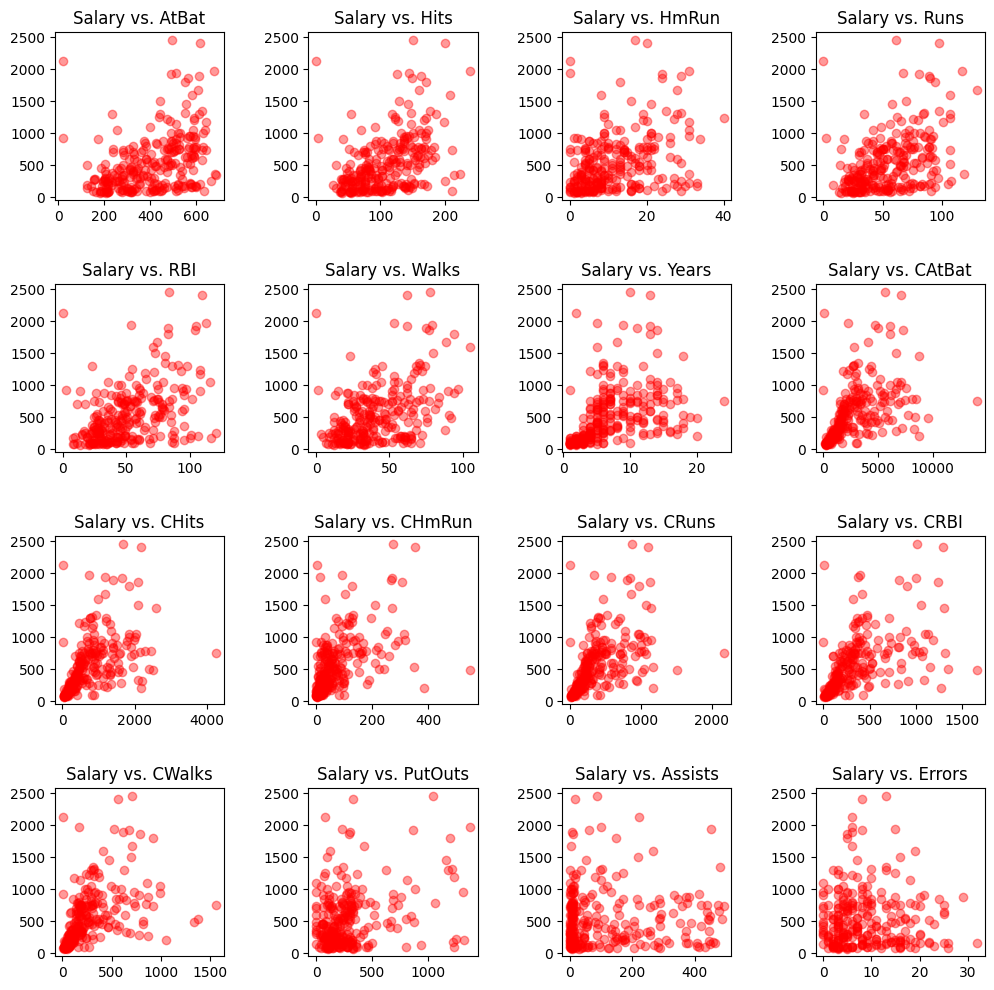

In [18]:
var_ind = list(range(1, 14)) + list(range(16, 19))
plt.figure(figsize = (12, 12))
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.scatter(x = data.iloc[: , var_ind[i - 1]], 
                y = data['Salary'], 
                alpha = 0.4, color = 'red')
    plt.title('Salary vs. ' + data.columns[var_ind[i - 1]])

## Data Preparation

In [19]:
#Remove players' name
data.drop(columns = 'Name', inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64(1), 

## Build Linear Regression Model

In [20]:
#Split data into test and train
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.2, random_state = 1234)
print(train.shape)
print(test.shape)

(210, 20)
(53, 20)


In [21]:
#Note: sklearn decision trees do not handle categorical data
#Possible solutions:
#Integer encoding for ordinal variables
#One-hot encoding for nominal variables
#Create dummy variables for categorical variables
dummy_vars = pd.get_dummies(train[['League', 'Division', 'NewLeague']])
dummy_vars.drop(columns = ['League_A', 'Division_E', 'NewLeague_A'], inplace = True)
dummy_vars.head()

,League_N,Division_W,NewLeague_N
98,True,True,True
206,True,True,True
54,False,False,False
177,False,False,False
27,True,True,True


## Define feature matrix 

In [22]:
X_train = train.drop(columns = ['Salary', 'League', 'Division', 'NewLeague'])
X_train = pd.concat([X_train, dummy_vars], axis = 1)
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
98,415,115,27,97,71,68,3,711,184,45,156,119,99,274,2,7,True,True,True
206,407,93,8,47,30,30,2,969,230,14,121,69,68,172,317,25,True,True,True
54,403,101,12,45,53,39,12,5150,1429,166,747,666,526,316,6,5,False,False,False
177,441,118,28,84,86,68,8,2723,750,126,433,420,309,190,2,2,False,False,False
27,474,129,10,50,56,40,10,2331,604,61,246,327,166,732,83,13,True,True,True


## Define response matrix

In [23]:
y_train = train['Salary']
y_train

98      300.0
206     150.0
54      675.0
177    1300.0
27      750.0
        ...  
183     125.0
192     525.0
256     400.0
72      850.0
263     740.0
Name: Salary, Length: 210, dtype: float64

### Box-Cox transformation

In [24]:
from sklearn.preprocessing import PowerTransformer
boxcox = PowerTransformer(method = 'box-cox')
trans_y_train = boxcox.fit_transform(y_train.values.reshape(-1, 1))

## Linear regression - model 1

In [25]:
from sklearn.linear_model import LinearRegression

#Create linear regression model
model_1 = LinearRegression()

#Fit the linear regressor on the train
model_1.fit(X_train, trans_y_train)

#Linear regression coefficients
print(model_1.coef_)
print(model_1.intercept_)

[[-2.74255151e-03  1.45741977e-02  2.16710678e-02 -5.58637209e-03
  -4.25192113e-03  1.14281864e-02  4.84542503e-02 -7.98832909e-06
  -1.23775574e-04 -1.01144275e-03  2.25292196e-03  2.38982083e-04
  -1.33134926e-03  3.40183760e-04  4.82873284e-04 -4.43375452e-03
   1.81255019e-01 -2.38908046e-01 -6.06051410e-02]]
[-1.45350962]


In [26]:
#Predict the response in the train
y_train_pred_1 = model_1.predict(X_train)
#Inverse transformation of predicted values
y_train_pred_1 = pd.Series(boxcox.inverse_transform(y_train_pred_1.reshape(-1, 1)).reshape(-1))

from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error, r2_score
#The root mean squared error
print('RMSE: {:0.3f}'.format(root_mean_squared_error(y_train, y_train_pred_1)))
#MAPE
print('MAPE: {:0.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred_1) * 100))
#The coefficient of determination
print('R2: {:0.3f}'.format(r2_score(y_train, y_train_pred_1)))

RMSE: 344.510
MAPE: 54.929
R2: 0.453


In [27]:
#Predict the response in the test - model 1
#Create dummy variables for categorical variables
dummy_vars = pd.get_dummies(test[['League', 'Division', 'NewLeague']])
dummy_vars.drop(columns = ['League_A', 'Division_E', 'NewLeague_A'], inplace = True)

#Define feature matrix 
X_test = test.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1)
X_test = pd.concat([X_test, dummy_vars], axis = 1)

In [28]:
#Prediction
y_test_pred_1 = model_1.predict(X_test)
#Inverse transformation of predicted values
y_test_pred_1 = pd.Series(boxcox.inverse_transform(y_test_pred_1.reshape(-1, 1)).reshape(-1),
                          index = test.index)

#Absolute error
abs_err_1 = abs(test['Salary'] - y_test_pred_1)

#RMSE, MAPE, MAE, and median, sd, IQR, max, min of absolute errors
from scipy.stats import iqr
models_comp = pd.DataFrame({'RMSE': root_mean_squared_error(test['Salary'], 
                                                            y_test_pred_1),
                            'MAPE': mean_absolute_percentage_error(test['Salary'], 
                                                                   y_test_pred_1) * 100,
                            'MAE' : abs_err_1.mean(),
                            'Median of AbsErrors' : abs_err_1.median(),
                            'SD of AbsErrors' :     abs_err_1.std(),
                            'IQR of AbsErrors':     iqr(abs_err_1),
                            'Min of AbsErrors':     abs_err_1.min(),
                            'Max of AbsErrors':     abs_err_1.max()}, 
                           index = ['LM - All Features - Box Cox'])
models_comp 

,RMSE,MAPE,MAE,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM - All Features - Box Cox,357.239471,69.456594,228.917069,137.352105,276.881737,173.718115,9.900677,1760.079303


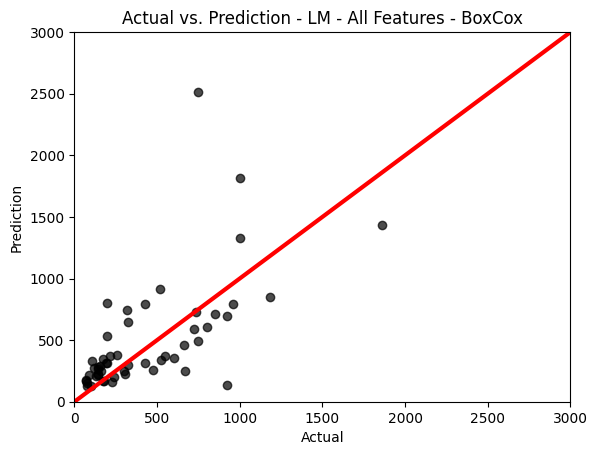

In [29]:
#Actual vs. Prediction
plt.scatter(x = test['Salary'], y = y_test_pred_1, c = 'black', alpha = 0.7)
plt.xlim(0, 3000)
plt.ylim(0, 3000)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction - LM - All Features - BoxCox')

#Add 45 degree line
xp = np.linspace(0, 3000, 100)
plt.plot(xp, xp, c = 'red', linewidth = 3)
plt.show()

## Ridge regression - model 2

In [30]:
#Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [31]:
#Grid
alpha_grid = 10 ** np.linspace(3, -3, 100)
print(alpha_grid)

[1.00000000e+03 8.69749003e+02 7.56463328e+02 6.57933225e+02
 5.72236766e+02 4.97702356e+02 4.32876128e+02 3.76493581e+02
 3.27454916e+02 2.84803587e+02 2.47707636e+02 2.15443469e+02
 1.87381742e+02 1.62975083e+02 1.41747416e+02 1.23284674e+02
 1.07226722e+02 9.32603347e+01 8.11130831e+01 7.05480231e+01
 6.13590727e+01 5.33669923e+01 4.64158883e+01 4.03701726e+01
 3.51119173e+01 3.05385551e+01 2.65608778e+01 2.31012970e+01
 2.00923300e+01 1.74752840e+01 1.51991108e+01 1.32194115e+01
 1.14975700e+01 1.00000000e+01 8.69749003e+00 7.56463328e+00
 6.57933225e+00 5.72236766e+00 4.97702356e+00 4.32876128e+00
 3.76493581e+00 3.27454916e+00 2.84803587e+00 2.47707636e+00
 2.15443469e+00 1.87381742e+00 1.62975083e+00 1.41747416e+00
 1.23284674e+00 1.07226722e+00 9.32603347e-01 8.11130831e-01
 7.05480231e-01 6.13590727e-01 5.33669923e-01 4.64158883e-01
 4.03701726e-01 3.51119173e-01 3.05385551e-01 2.65608778e-01
 2.31012970e-01 2.00923300e-01 1.74752840e-01 1.51991108e-01
 1.32194115e-01 1.149757

In [32]:
#K-fold cross validation to choose the best model
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

cv_errors = np.zeros(shape = len(alpha_grid)) #to save cv results

import time #to measure the processing time
start_time = time.time()

#K-fold cross validation
for i in range(len(alpha_grid)):
    ridge = Ridge(alpha = alpha_grid[i])
    scores = cross_val_score(estimator = ridge, 
                             X = X_train_scaled, 
                             y = trans_y_train,
                             scoring = 'neg_root_mean_squared_error',
                             cv = 5, n_jobs = -1)
    cv_errors[i] = scores.mean() 
#To check scoring: 
#https://scikit-learn.org/stable/modules/model_evaluation.html

end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  9.33142876625061 seconds


In [33]:
#Best lambda
best_alpha = alpha_grid[np.argmax(cv_errors)]
print(best_alpha)

26.560877829466868


In [34]:
#Ridge regression w/ Box Cox transformation - model 2
from sklearn.linear_model import Ridge
#Create ridge regression model
model_2 = Ridge(alpha = best_alpha)
#Fit the ridge regressor on the train
model_2.fit(X_train_scaled, trans_y_train)
#Ridge regression coefficients
print(model_2.coef_)
print(model_2.intercept_)

[-0.0141723   0.17519056  0.03823099  0.06670085  0.0227881   0.08917691
  0.13566174  0.09327125  0.14520349 -0.01130061  0.13114115  0.0515724
 -0.02501404  0.07863884  0.04537909 -0.03173266  0.06770652 -0.10581254
 -0.0094946 ]
[5.36601049e-16]


In [35]:
#Predict the response in the train
y_train_pred_2 = model_2.predict(X_train_scaled)
#Inverse transformation of predicted values
y_train_pred_2 = pd.Series(boxcox.inverse_transform(y_train_pred_2.reshape(-1, 1)).reshape(-1))

from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error, r2_score
#The root mean squared error
print('RMSE: {:0.3f}'.format(root_mean_squared_error(y_train, y_train_pred_2)))
#MAPE
print('MAPE: {:0.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred_2) * 100))
#The coefficient of determination
print('R2: {:0.3f}'.format(r2_score(y_train, y_train_pred_2)))

RMSE: 359.826
MAPE: 56.038
R2: 0.403


In [36]:
#Scale data
X_test_scaled = scaler.transform(X_test)

#Predict the response in the test - model 2
y_test_pred_2 = model_2.predict(X_test_scaled)
#Inverse transformation of predicted values
y_test_pred_2 = pd.Series(boxcox.inverse_transform(y_test_pred_2.reshape(-1, 1)).reshape(-1),
                         index = test.index)

#Absolute error
abs_err_2 = abs(test['Salary'] - y_test_pred_2)

#RMSE, MAPE, MAE, and median, sd, IQR, max, min of absolute errors
from scipy.stats import iqr
models_comp = pd.concat([models_comp, 
                         pd.DataFrame({'RMSE': root_mean_squared_error(test['Salary'], y_test_pred_2),
                                       'MAPE': mean_absolute_percentage_error(test['Salary'], y_test_pred_2) * 100,
                                       'MAE' : abs_err_2.mean(),
                                       'Median of AbsErrors' : abs_err_2.median(),
                                       'SD of AbsErrors' :     abs_err_2.std(),
                                       'IQR of AbsErrors':     iqr(abs_err_2),
                                       'Min of AbsErrors':     abs_err_2.min(),
                                       'Max of AbsErrors':     abs_err_2.max()}, 
                                      index = ['Ridge Regression - Box Cox'])])
models_comp

,RMSE,MAPE,MAE,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM - All Features - Box Cox,357.239471,69.456594,228.917069,137.352105,276.881737,173.718115,9.900677,1760.079303
Ridge Regression - Box Cox,333.930544,72.665324,217.763801,151.576021,255.579747,140.885689,9.499340,1587.503885


## Build Decsion Tree, Random Forest and Stochastic Gradient Descent Models

### Decision Tree

## Decision Tree - model 3

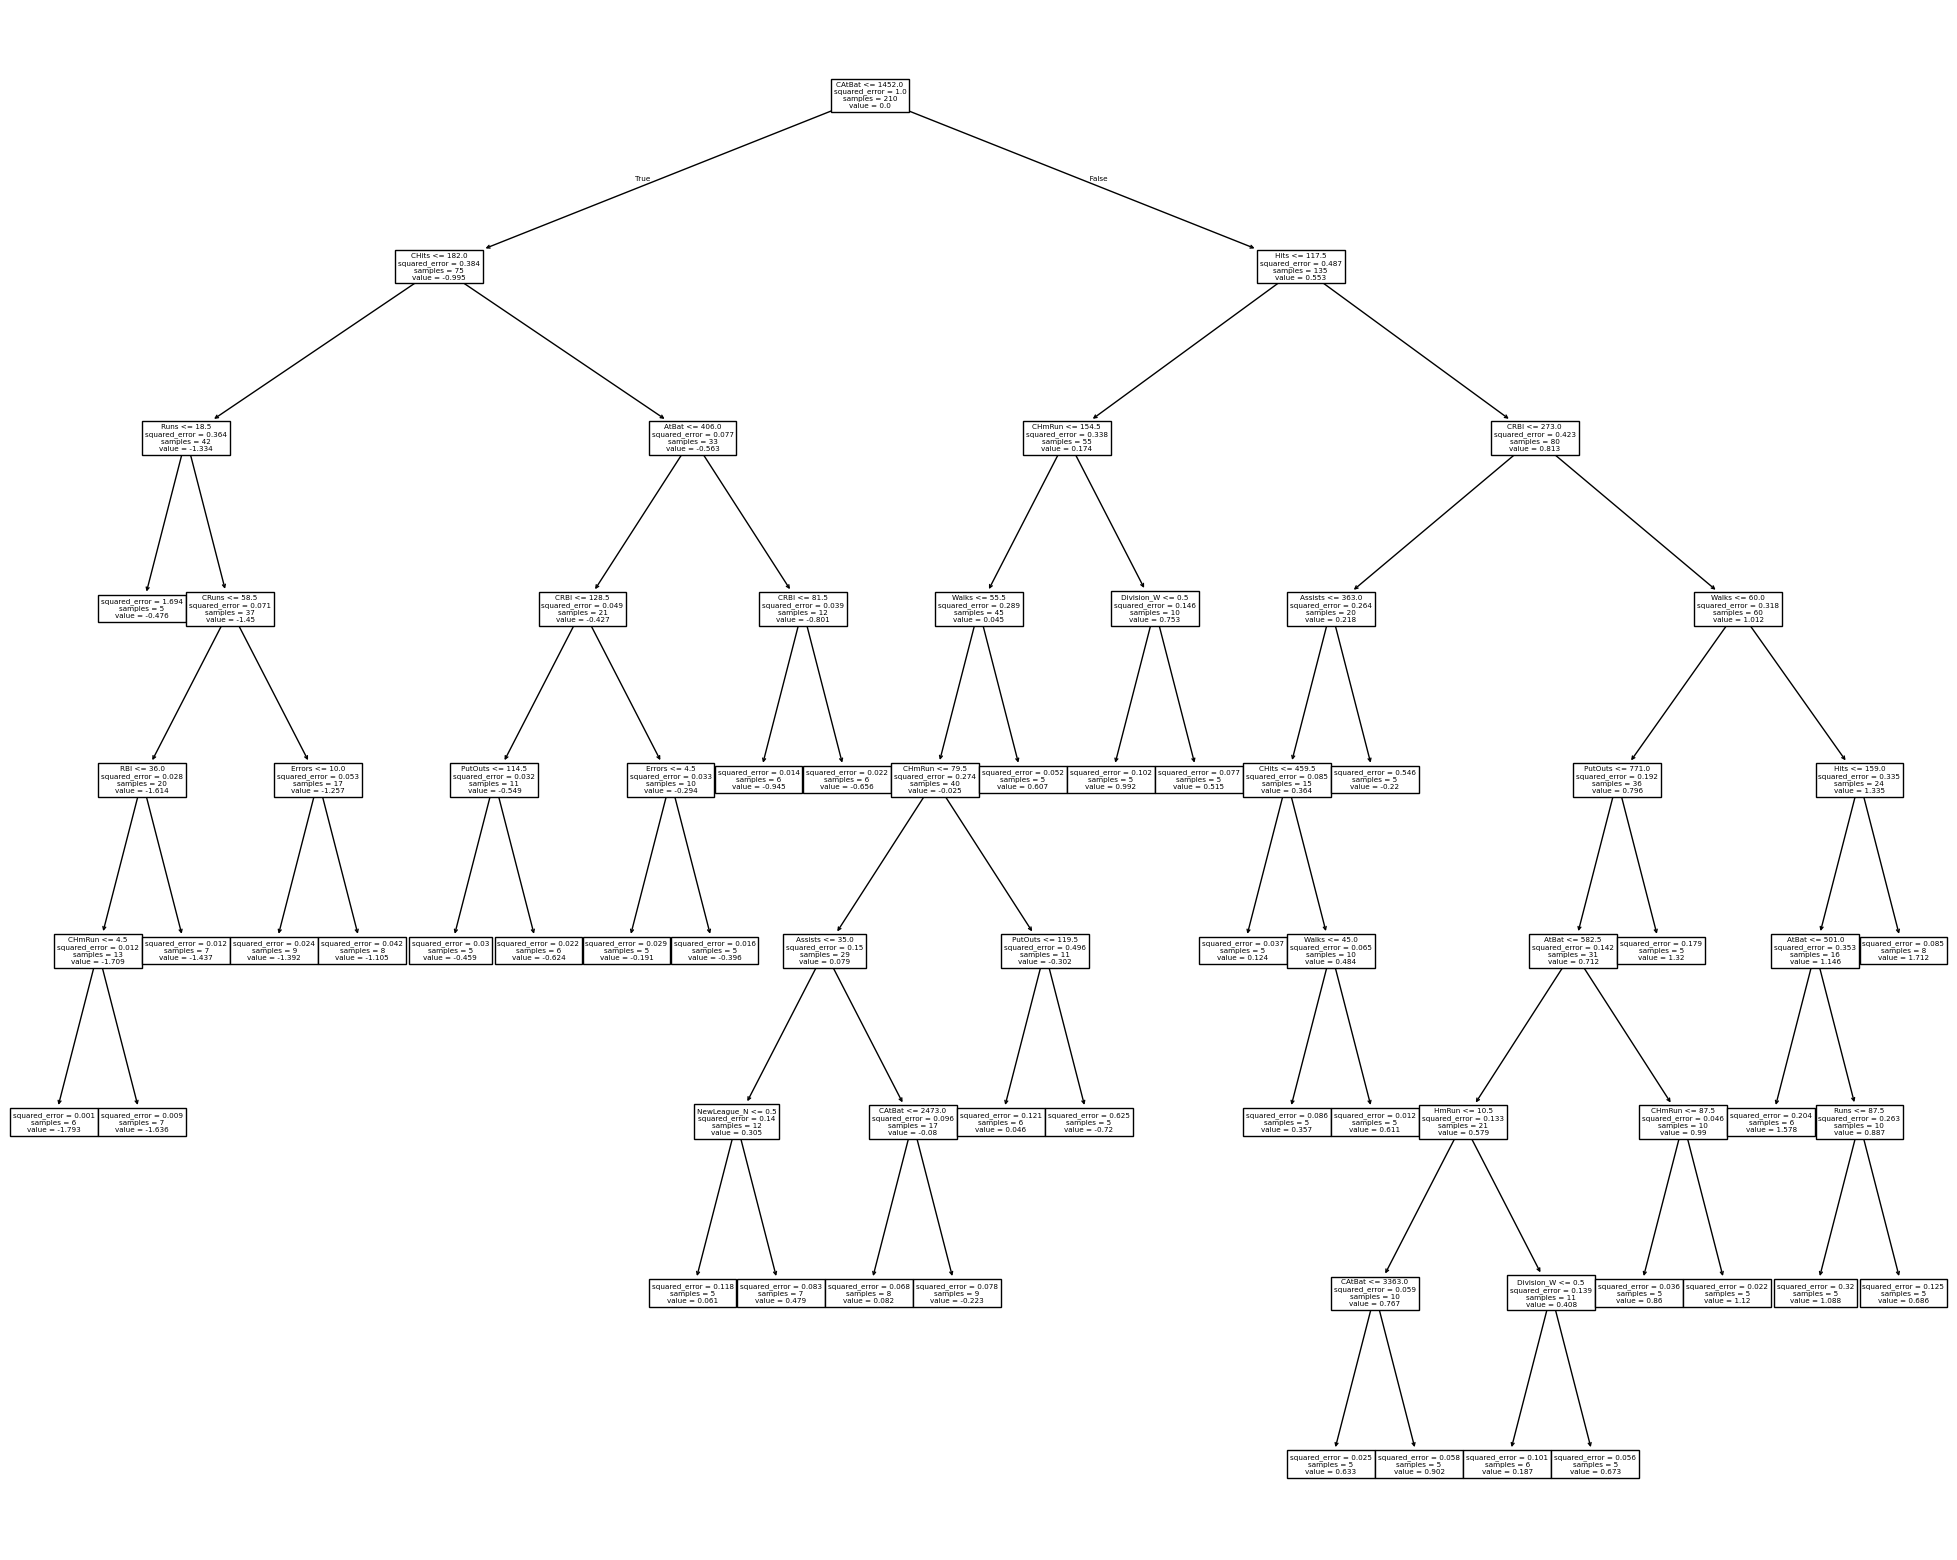

In [37]:
from sklearn.tree import DecisionTreeRegressor
#Post prunning approach

#Create decision tree model
model_3 = DecisionTreeRegressor(criterion = 'squared_error',
                                max_depth = 10, 
                                min_samples_leaf = 5, 
                                ccp_alpha = 0)

#Fit the decision tree regressor on the train
model_3.fit(X_train, trans_y_train)

#Plot the Tree
from sklearn.tree import plot_tree
plt.figure(figsize = (25, 20))
plot_tree(model_3, feature_names = X_train.columns)
plt.show()

## Post prunning method

In [38]:
prunning_path = model_3.cost_complexity_pruning_path(X_train, trans_y_train)
prunning_path

{'ccp_alphas': array([0.00000000e+00, 3.55312367e-04, 3.82362473e-04, 4.98719608e-04,
        7.63847551e-04, 8.05424731e-04, 8.62695118e-04, 1.19640049e-03,
        1.59370188e-03, 1.62931248e-03, 1.66660629e-03, 1.88044470e-03,
        1.92736352e-03, 2.05492828e-03, 2.42794636e-03, 2.70499791e-03,
        3.07034900e-03, 3.22408109e-03, 4.94675714e-03, 5.06501871e-03,
        5.44093450e-03, 5.56797986e-03, 6.09425003e-03, 6.57014807e-03,
        7.57945410e-03, 8.33852959e-03, 8.47284529e-03, 1.95538070e-02,
        1.98965068e-02, 1.99162723e-02, 4.49990201e-02, 5.22578363e-02,
        6.34714086e-02, 5.49717743e-01]),
 'impurities': array([0.13015832, 0.13051363, 0.13089599, 0.13139471, 0.13215856,
        0.13296398, 0.13382668, 0.13502308, 0.13661678, 0.13824609,
        0.1399127 , 0.14179315, 0.14372051, 0.14577544, 0.14820338,
        0.15090838, 0.15397873, 0.15720281, 0.16214957, 0.16721459,
        0.17265552, 0.1782235 , 0.18431775, 0.19745805, 0.2050375 ,
        0.2217

In [39]:
#Grid
alpha_grid = prunning_path['ccp_alphas']

## K-fold cross validation to choose the best model

In [40]:
from sklearn.model_selection import cross_val_score

cv_errors = np.zeros(shape = len(alpha_grid)) #to save cv results

import time #to measure the processing time
start_time = time.time()
for i in range(len(alpha_grid)):
    tree_reg = DecisionTreeRegressor(criterion = 'squared_error',
                                     max_depth = 10, 
                                     min_samples_leaf = 5, 
                                     ccp_alpha = alpha_grid[i])
    scores = cross_val_score(estimator = tree_reg, 
                             X = X_train, 
                             y = trans_y_train,
                             scoring = 'neg_root_mean_squared_error',
                             cv = 5, n_jobs = -1)
    cv_errors[i] = scores.mean() 
#To check scoring: 
#https://scikit-learn.org/stable/modules/model_evaluation.html

end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  38.259071588516235 seconds


In [41]:
#Best alpha
best_alpha = alpha_grid[np.argmax(cv_errors)]
print(best_alpha)

0.04499902007173859


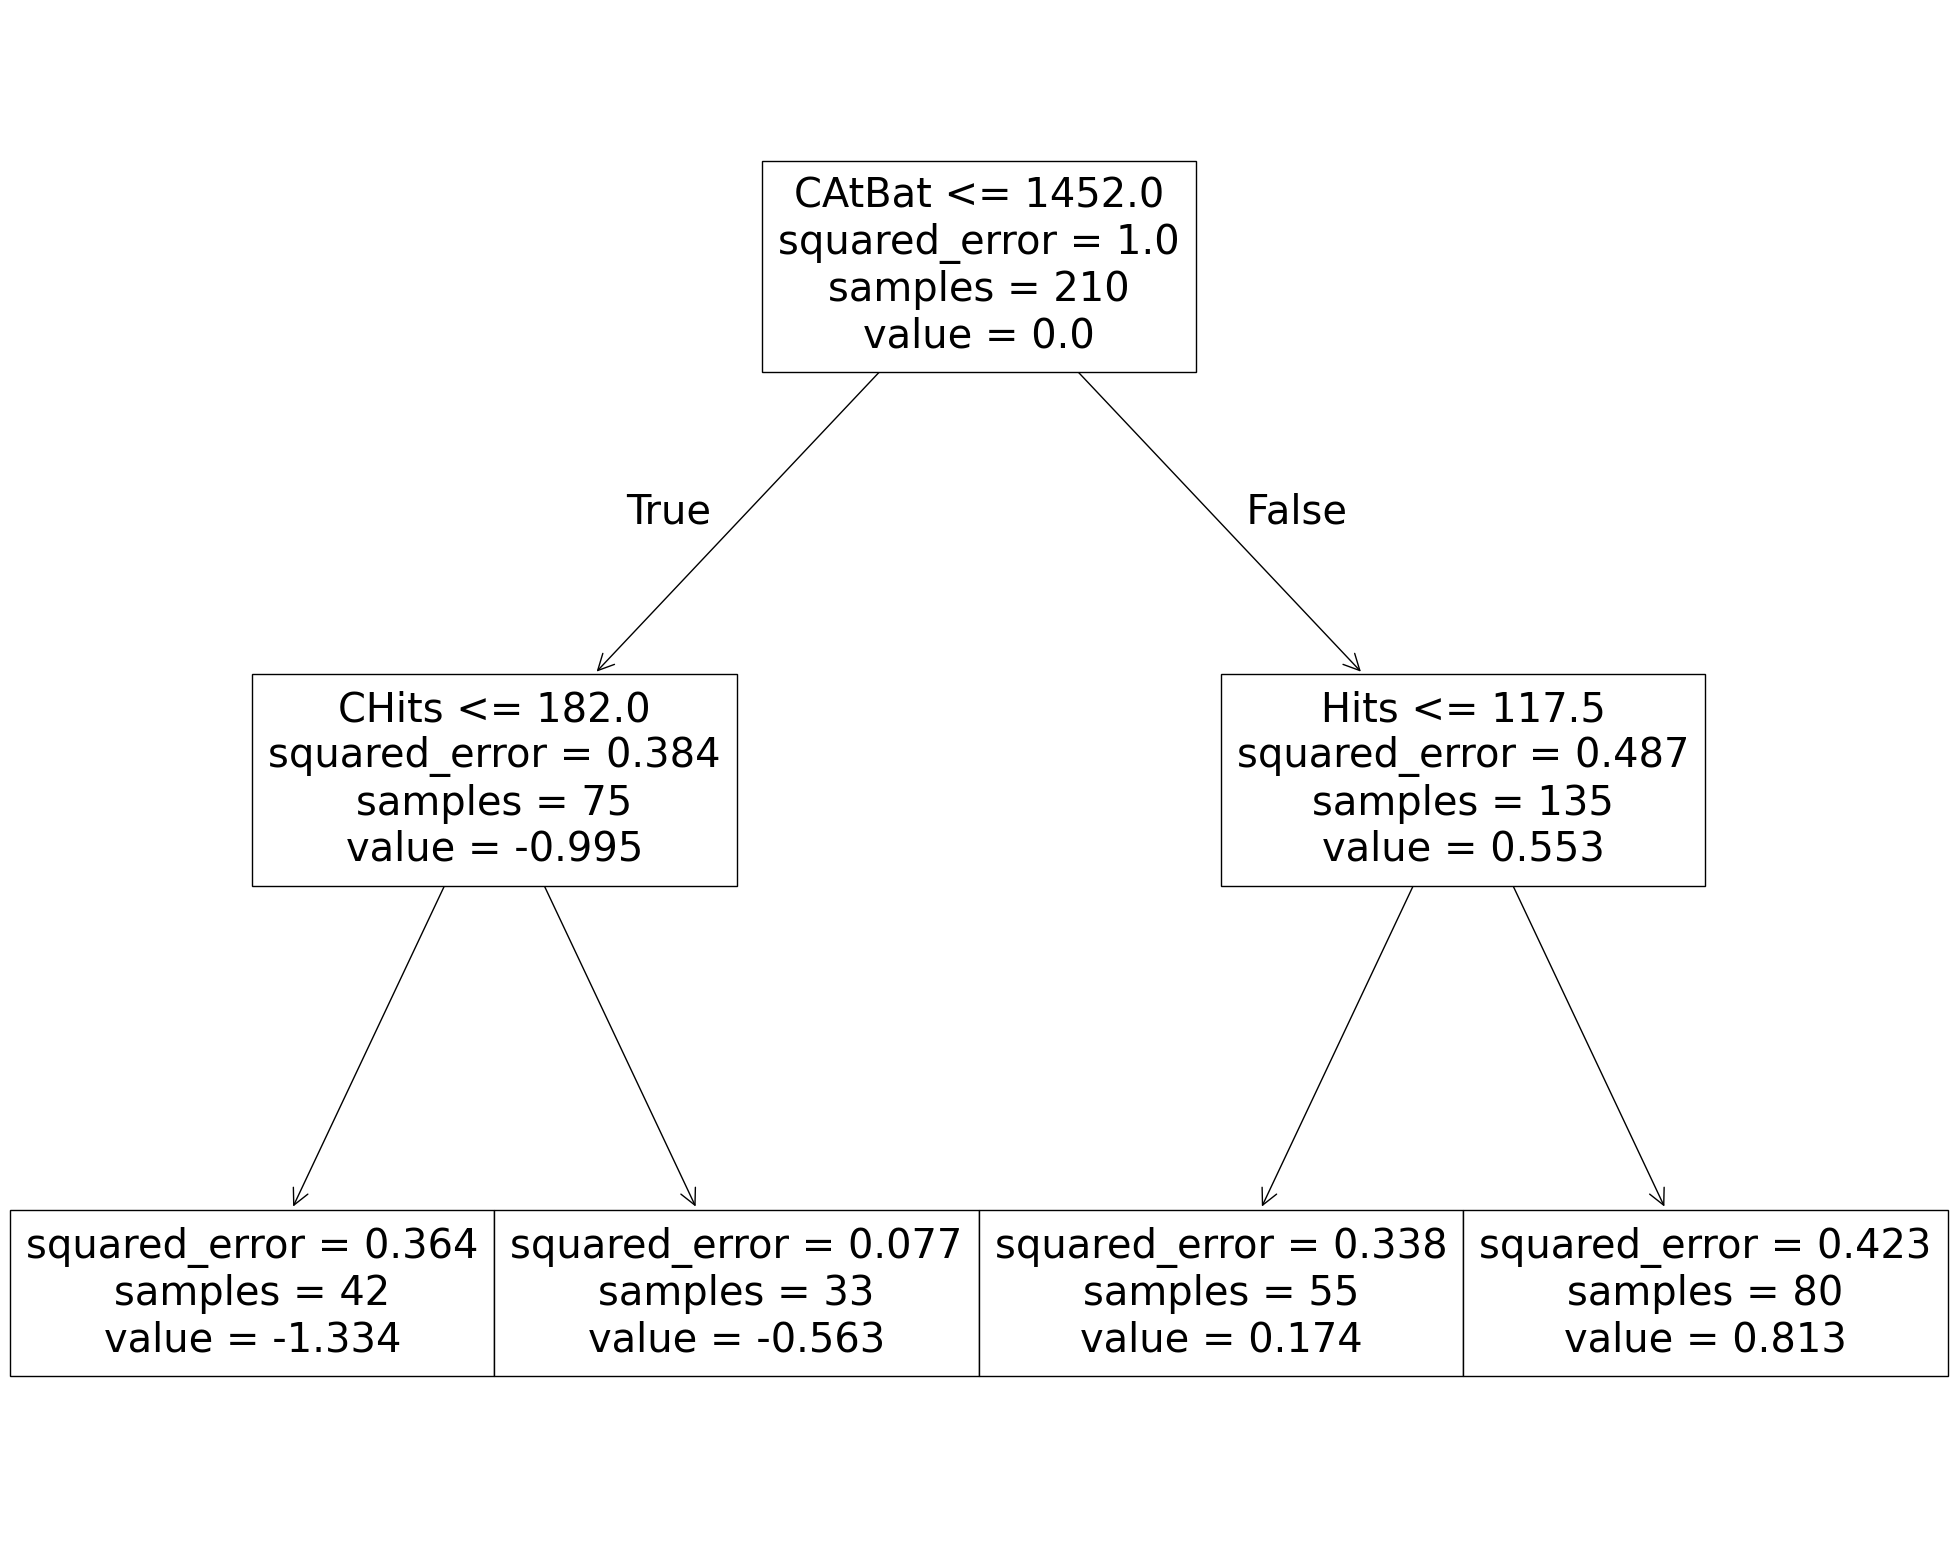

In [42]:
#Best model
#Create decision tree model - model 3
model_3 = DecisionTreeRegressor(criterion = 'squared_error',
                                max_depth = 10, 
                                min_samples_leaf = 5, 
                                ccp_alpha = best_alpha)
#Fit the decision tree regressor on the train
model_3.fit(X_train, trans_y_train)
#Plot the Tree
from sklearn.tree import plot_tree
plt.figure(figsize = (25, 20))
plot_tree(model_3, feature_names = X_train.columns)
plt.show()

In [43]:
#Predict the response in the train
y_train_pred_3 = model_3.predict(X_train)
#Inverse transformation of predicted values
y_train_pred_3 = pd.Series(boxcox.inverse_transform(y_train_pred_3.reshape(-1, 1)).reshape(-1))

from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error, r2_score
#The root mean squared error
print('RMSE: {:0.3f}'.format(root_mean_squared_error(y_train, y_train_pred_3)))
#The root mean squared error
print('MAPE: {:0.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred_3) * 100))
#The coefficient of determination
print('R2: {:0.3f}'.format(r2_score(y_train, y_train_pred_3)))

RMSE: 355.020
MAPE: 40.288
R2: 0.419


In [44]:
#Predict the response in the test - model 3
y_test_pred_3 = model_3.predict(X_test)
#Inverse transformation of predicted values
y_test_pred_3 = pd.Series(boxcox.inverse_transform(y_test_pred_3.reshape(-1, 1)).reshape(-1),
                         index = test.index)

#Absolute error
abs_err_3 = abs(test['Salary'] - y_test_pred_3)

#RMSE, MAPE, MAE, and median, sd, IQR, max, min of absolute errors
from scipy.stats import iqr
models_comp = pd.concat([models_comp, 
                         pd.DataFrame({'RMSE': root_mean_squared_error(test['Salary'], y_test_pred_3),
                                       'MAPE': mean_absolute_percentage_error(test['Salary'], y_test_pred_3) * 100,
                                       'MAE' : abs_err_3.mean(),
                                       'Median of AbsErrors' : abs_err_3.median(),
                                       'SD of AbsErrors' :     abs_err_3.std(),
                                       'IQR of AbsErrors':     iqr(abs_err_3),
                                       'Min of AbsErrors':     abs_err_3.min(),
                                       'Max of AbsErrors':     abs_err_3.max()}, 
                                      index = ['Decision Tree - Box Cox'])])
models_comp

,RMSE,MAPE,MAE,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM - All Features - Box Cox,357.239471,69.456594,228.917069,137.352105,276.881737,173.718115,9.900677,1760.079303
Ridge Regression - Box Cox,333.930544,72.665324,217.763801,151.576021,255.579747,140.885689,9.499340,1587.503885
Decision Tree - Box Cox,238.794863,40.532800,155.231287,97.288376,183.192333,135.354349,2.955739,1039.171624


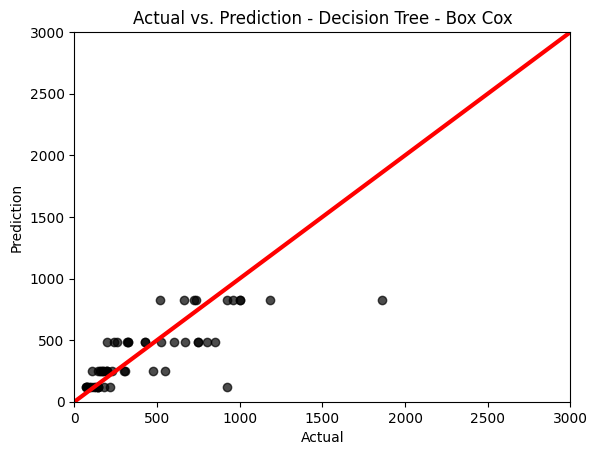

In [45]:
#Actual vs. Prediction
plt.scatter(x = test['Salary'], y = y_test_pred_3, c = 'black', alpha = 0.7)
plt.xlim(0, 3000)
plt.ylim(0, 3000)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction - Decision Tree - Box Cox')

#Add 45 degree line
xp = np.linspace(0, 3000, 100)
plt.plot(xp, xp, c = 'red', linewidth = 3)
plt.show()

### Random Forest

In [46]:
#Sample Random Forest model (not tuned) - model 4
from sklearn.ensemble import RandomForestRegressor
#Create random forest model
model_4 = RandomForestRegressor(n_estimators = 100,
                                max_features = 4, 
                                criterion = 'squared_error',
                                max_depth = 15, 
                                min_samples_leaf = 10, 
                                ccp_alpha = 0,
                                random_state = 123)
#Fit the random forest regressor on the train
model_4.fit(X_train, trans_y_train.flatten())

#Predict the response in the train
y_train_pred_4 = model_4.predict(X_train)
#Inverse transformation of predicted values
y_train_pred_4 = pd.Series(boxcox.inverse_transform(y_train_pred_4.reshape(-1, 1)).reshape(-1))

from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error, r2_score
#The root mean squared error
print('RMSE: {:0.3f}'.format(root_mean_squared_error(y_train, y_train_pred_4)))
#The root mean squared error
print('MAPE: {:0.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred_4) * 100))
#The coefficient of determination
print('R2: {:0.3f}'.format(r2_score(y_train, y_train_pred_4)))

RMSE: 296.390
MAPE: 31.118
R2: 0.595


In [47]:
#Create hyper-parameters grid
import itertools
n_estimators = [100, 200, 500]
max_features = ['sqrt', 'log2', None] #If None or 1.0, then max_features = n_features
max_depth = [2, 5, 10]
min_samples_leaf = [5, 10, 15]
params_grid = list(itertools.product(n_estimators, max_features, max_depth, min_samples_leaf))
params_grid = pd.DataFrame(data = params_grid,
                           index = range(1, 82), 
                           columns = ['n_estimators', 
                                      'max_features', 
                                      'max_depth', 
                                      'min_samples_leaf'])
params_grid

,n_estimators,max_features,max_depth,min_samples_leaf
1,100,sqrt,2,5
2,100,sqrt,2,10
3,100,sqrt,2,15
4,100,sqrt,5,5
5,100,sqrt,5,10
...,...,...,...,...
77,500,None,5,10
78,500,None,5,15
79,500,None,10,5
80,500,None,10,10


### K-fold cross validation to choose the best model hyperparameters

In [48]:
from sklearn.model_selection import cross_val_score

import time #to measure the processing time
start_time = time.time()
cv_errors = np.zeros(shape = len(params_grid)) #to save cv results
for i in range(len(params_grid)):
    rf_reg = RandomForestRegressor(n_estimators = params_grid.iloc[i, 0],
                                   max_features = params_grid.iloc[i, 1], 
                                   criterion = 'squared_error',
                                   max_depth = params_grid.iloc[i, 2], 
                                   min_samples_leaf = params_grid.iloc[i, 3], 
                                   ccp_alpha = 0)
    scores = cross_val_score(estimator = rf_reg, 
                             X = X_train, 
                             y = trans_y_train.flatten(),
                             scoring = 'neg_root_mean_squared_error',
                             cv = 5, n_jobs = -1)
    cv_errors[i] = scores.mean() 
#To check scoring: 
#https://scikit-learn.org/stable/modules/model_evaluation.html
end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  187.01536083221436 seconds


In [49]:
#Best model
params_grid.iloc[np.argmax(cv_errors), :]

n_estimators         100
max_features        sqrt
max_depth              5
min_samples_leaf       5
Name: 4, dtype: object

## Create random forest model - model 4

In [50]:
model_4 = RandomForestRegressor(n_estimators = params_grid.iloc[np.argmax(cv_errors), 0],
                                max_features = params_grid.iloc[np.argmax(cv_errors), 1], 
                                criterion = 'squared_error',
                                max_depth = params_grid.iloc[np.argmax(cv_errors), 2], 
                                min_samples_leaf = params_grid.iloc[np.argmax(cv_errors), 3], 
                                ccp_alpha = 0,
                                random_state = 123)

#Fit the random forest regressor on the train
model_4.fit(X_train, trans_y_train.flatten())

#Predict the response in the train
y_train_pred_4 = model_4.predict(X_train)

#Inverse transformation of predicted values
y_train_pred_4 = pd.Series(boxcox.inverse_transform(y_train_pred_4.reshape(-1, 1)).reshape(-1))

from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error, r2_score
#The root mean squared error
print('RMSE: {:0.3f}'.format(root_mean_squared_error(y_train, y_train_pred_4)))
#The root mean squared error
print('MAPE: {:0.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred_4) * 100))
#The coefficient of determination
print('R2: {:0.3f}'.format(r2_score(y_train, y_train_pred_4)))

RMSE: 269.646
MAPE: 27.033
R2: 0.665


### Calculate variable importance

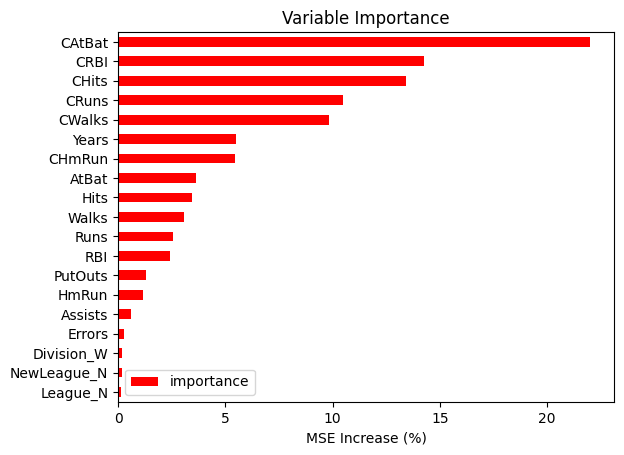

In [51]:
importance = pd.DataFrame({'importance': model_4.feature_importances_ * 100}, 
                          index = X_train.columns)
importance.sort_values(by = 'importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'r')
plt.title('Variable Importance')
plt.xlabel('MSE Increase (%)')
plt.show()

In [52]:
#Predict the response in the test - model 4
y_test_pred_4 = model_4.predict(X_test)
#Inverse transformation of predicted values
y_test_pred_4 = pd.Series(boxcox.inverse_transform(y_test_pred_4.reshape(-1, 1)).reshape(-1), 
                          index = test.index)

#Absolute error
abs_err_4 = abs(test['Salary'] - y_test_pred_4)

#RMSE, MAPE, MAE, and median, sd, IQR, max, min of absolute errors
from scipy.stats import iqr
models_comp = pd.concat([models_comp,
                         pd.DataFrame({'RMSE': root_mean_squared_error(test['Salary'], 
                                                                       y_test_pred_4),
                                       'MAPE': mean_absolute_percentage_error(test['Salary'], 
                                                                              y_test_pred_4) * 100,
                                       'MAE' : abs_err_4.mean(),
                                       'Median of AbsErrors' : abs_err_4.median(),
                                       'SD of AbsErrors' :     abs_err_4.std(),
                                       'IQR of AbsErrors':     iqr(abs_err_4),
                                       'Min of AbsErrors':     abs_err_4.min(),
                                       'Max of AbsErrors':     abs_err_4.max()}, 
                                      index = ['Random Forest - Box Cox'])])
models_comp

,RMSE,MAPE,MAE,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM - All Features - Box Cox,357.239471,69.456594,228.917069,137.352105,276.881737,173.718115,9.900677,1760.079303
Ridge Regression - Box Cox,333.930544,72.665324,217.763801,151.576021,255.579747,140.885689,9.499340,1587.503885
Decision Tree - Box Cox,238.794863,40.532800,155.231287,97.288376,183.192333,135.354349,2.955739,1039.171624
Random Forest - Box Cox,202.493110,37.560509,124.595460,63.471897,161.150302,148.236883,0.821588,771.181220


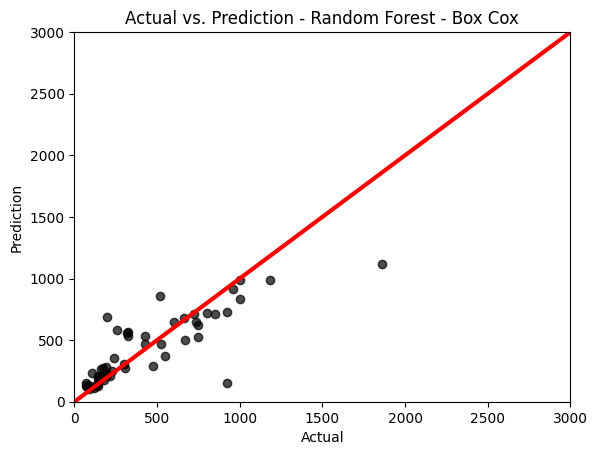

In [53]:
#Actual vs. Prediction
plt.scatter(x = test['Salary'], y = y_test_pred_4, c = 'black', alpha = 0.7)
plt.xlim(0, 3000)
plt.ylim(0, 3000)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction - Random Forest - Box Cox')

#Add 45 degree line
xp = np.linspace(0, 3000, 100)
plt.plot(xp, xp, c = 'red', linewidth = 3)
plt.show()

### Stochastic Gradient Boost

### SGB Regressor (not tuned) - model 5

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

#Create SGB regressor model
model_5 = GradientBoostingRegressor(learning_rate = 0.1, #learning rate
                                    n_estimators = 100,  #the total number of trees to fit
                                    subsample = 1.0,      #the fraction of samples to be used,  
                                                                    #if .< 1, Stochastic GB
                                    max_depth = 1,        #the maximum depth of each tree
                                    min_samples_leaf = 20, #the minimum number of observations in the leaf nodes of the trees
                                    random_state = 1234)


#Fit the SGB regressor on the train
model_5.fit(X_train, trans_y_train.flatten())

#Predict the response in the train
y_train_pred_5 = model_5.predict(X_train)
#Inverse transformation of predicted values
y_train_pred_5 = pd.Series(boxcox.inverse_transform(y_train_pred_5.reshape(-1, 1)).reshape(-1))


from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error, r2_score
#The root mean squared error
print('RMSE: {:0.3f}'.format(root_mean_squared_error(y_train, y_train_pred_5)))
#The root mean squared error
print('MAPE: {:0.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred_5) * 100))
#The coefficient of determination
print('R2: {:0.3f}'.format(r2_score(y_train, y_train_pred_5)))

RMSE: 281.707
MAPE: 31.137
R2: 0.634


In [55]:
#Grid
#K-Fold Cross Validation for Choosing Hyper-parameters
#Create Hyper-parameters grid
import itertools
learning_rate = [0.001, 0.01, 0.1]
n_estimators = [100, 200, 500]
subsample = [0.5, 0.8, 1]
max_depth = [1, 2, 5]
min_samples_leaf = [5, 10, 20]
params_grid = list(itertools.product(learning_rate, n_estimators, subsample, max_depth, min_samples_leaf))
params_grid = pd.DataFrame(data = params_grid, index = range(1, 244), columns = ['learning_rate', 
                                                                                 'n_estimators',
                                                                                 'subsample', 
                                                                                 'max_depth',
                                                                                 'min_samples_leaf'])
params_grid

,learning_rate,n_estimators,subsample,max_depth,min_samples_leaf
1,0.001,100,0.5,1,5
2,0.001,100,0.5,1,10
3,0.001,100,0.5,1,20
4,0.001,100,0.5,2,5
5,0.001,100,0.5,2,10
...,...,...,...,...,...
239,0.100,500,1.0,2,10
240,0.100,500,1.0,2,20
241,0.100,500,1.0,5,5
242,0.100,500,1.0,5,10


In [56]:
#K-fold cross validation to choose the best model
from sklearn.model_selection import cross_val_score

#Save cv results
cv_errors = np.zeros(shape = len(params_grid)) 

import time #to measure the processing time
start_time = time.time()
for i in range(len(params_grid)):
    gb_reg = GradientBoostingRegressor(learning_rate    = params_grid.iloc[i, 0],  
                                       n_estimators     = params_grid.iloc[i, 1],  
                                       subsample        = params_grid.iloc[i, 2],      
                                       max_depth        = params_grid.iloc[i, 3],        
                                       min_samples_leaf = params_grid.iloc[i, 4])
    scores = cross_val_score(estimator = gb_reg, 
                             X = X_train, 
                             y = trans_y_train.flatten(),
                             scoring = 'neg_root_mean_squared_error',
                             cv = 5, n_jobs = -1)
    cv_errors[i] = scores.mean() 

end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  416.8244092464447 seconds


In [57]:
#Best model
params_grid.iloc[np.argmax(cv_errors)]

learning_rate         0.01
n_estimators        500.00
subsample             0.80
max_depth             2.00
min_samples_leaf     20.00
Name: 150, dtype: float64

### SGB Regressor (tuned)- model 5

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
#Create SGB regressor model
model_5 = GradientBoostingRegressor(learning_rate    = params_grid.iloc[np.argmax(cv_errors), 0],   
                                    n_estimators     = params_grid.iloc[np.argmax(cv_errors), 1],  
                                    subsample        = params_grid.iloc[np.argmax(cv_errors), 2],       
                                    max_depth        = params_grid.iloc[np.argmax(cv_errors), 3],       
                                    min_samples_leaf = params_grid.iloc[np.argmax(cv_errors), 4], 
                                    random_state = 1234)

#Fit the SGB regressor on the train
model_5.fit(X_train, trans_y_train.flatten())

#Predict the response in the train
y_train_pred_5 = model_5.predict(X_train)
#Inverse transformation of predicted values
y_train_pred_5 = pd.Series(boxcox.inverse_transform(y_train_pred_5.reshape(-1, 1)).reshape(-1))

from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error, r2_score
#The root mean squared error
print('RMSE: {:0.3f}'.format(root_mean_squared_error(y_train, y_train_pred_5)))
#The root mean squared error
print('MAPE: {:0.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred_5) * 100))
#The coefficient of determination
print('R2: {:0.3f}'.format(r2_score(y_train, y_train_pred_5)))

RMSE: 261.552
MAPE: 26.906
R2: 0.685


In [59]:
#Predict the response in the test - model 5
y_test_pred_5 = model_5.predict(X_test)
#Inverse transformation of predicted values
y_test_pred_5 = pd.Series(boxcox.inverse_transform(y_test_pred_5.reshape(-1, 1)).reshape(-1), 
                          index = test.index)

#Absolute error
abs_err_5 = abs(test['Salary'] - y_test_pred_5)

#RMSE, MAPE, MAE, and median, sd, IQR, max, min of absolute errors
from scipy.stats import iqr
models_comp = pd.concat([models_comp,
                         pd.DataFrame({'RMSE': root_mean_squared_error(test['Salary'], 
                                                                       y_test_pred_5),
                                       'MAPE': mean_absolute_percentage_error(test['Salary'], 
                                                                              y_test_pred_5) * 100,
                                       'MAE' : abs_err_5.mean(),
                                       'Median of AbsErrors' : abs_err_5.median(),
                                       'SD of AbsErrors' :     abs_err_5.std(),
                                       'IQR of AbsErrors':     iqr(abs_err_5),
                                       'Min of AbsErrors':     abs_err_5.min(),
                                       'Max of AbsErrors':     abs_err_5.max()}, 
                                      index = ['SGB Regressor - Box Cox'])])
models_comp

,RMSE,MAPE,MAE,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM - All Features - Box Cox,357.239471,69.456594,228.917069,137.352105,276.881737,173.718115,9.900677,1760.079303
Ridge Regression - Box Cox,333.930544,72.665324,217.763801,151.576021,255.579747,140.885689,9.499340,1587.503885
Decision Tree - Box Cox,238.794863,40.532800,155.231287,97.288376,183.192333,135.354349,2.955739,1039.171624
Random Forest - Box Cox,202.493110,37.560509,124.595460,63.471897,161.150302,148.236883,0.821588,771.181220
SGB Regressor - Box Cox,202.399486,34.246587,123.203448,73.511261,162.118340,131.593356,2.429428,824.577335


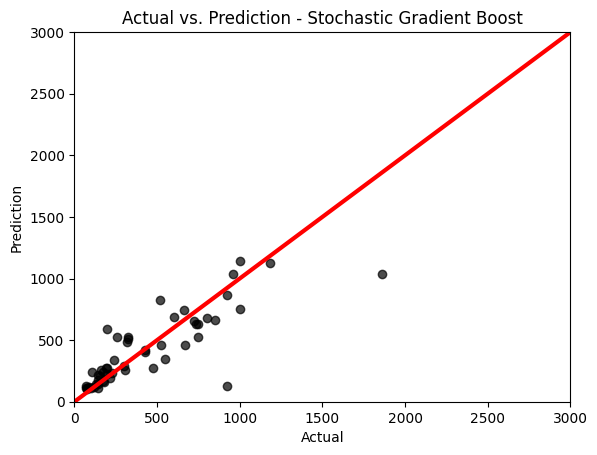

In [60]:
#Actual vs. Prediction
plt.scatter(x = test['Salary'], y = y_test_pred_5, c = 'black', alpha = 0.7)
plt.xlim(0, 3000)
plt.ylim(0, 3000)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction - Stochastic Gradient Boost')

#Add 45 degree line
xp = np.linspace(0, 3000, 100)
plt.plot(xp, xp, c = 'red', linewidth = 3)
plt.show()